## Analísis a precios de propiedades

Proyecto realizado por: 

Fuentes de datos:

1. **ids_clean.csv** (Índice de Desarrollo Social por Colonias de la Ciudad de México) obtenido a partir de este [enlace](https://evalua.cdmx.gob.mx/principales-atribuciones/medicion-del-indice-de-desarrollo-social-de-las-unidades-territoriales/medicion-del-indice-de-desarrollo-social-de-las-unidades-territoriales/bases-de-datos). Consultado el 12 de diciembre de 2023.

2. **inmuebles24_2.csv** (Scraping a diferentes inmubles dentro de la ciudad de México) obtenido a partir de la pagina www.inmuebles24.com mediante el uso de webscraping. Realizado el 8 de enero de 2024 con la finalidad de obtener los datos más recientes.

Pasos a seguir:

- **Transformacion de datos**: Unir ambas bases de datos (Indice de desarrollo social y scraping a pagina de renta de inmuebles) mediante el nombre de colonia.
- **EDA**: Realizar un Analísis exploratorio a los datos con la finalidad de encontrar hallazgos.
- Buscar el mejor modelo para adaptar una prediccion de precio de los locales dado la zona y el número de metros cuadrados.

Importar librerias que vamos a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
#imporar inmuebles24_2.csv
df_inmuebles = pd.read_csv('inmuebles24_2.csv'  , encoding='utf8')
df_ids = pd.read_csv('ids_clean.csv'  , encoding='utf8')

In [89]:
df_inmuebles.head(3)

,precio,ubicacion,tamanio,direccion,colonia,alcaldia,colonia_clean,mejor_coincidencia
0,29900,"Jose Maria Castorena 232, El Yaqui, Cuajimal...",802,Jose Maria Castorena 232,El Yaqui,Cuajimalpa de Morelos,el yaqui,el yaqui
1,18000,"Montecito 38, Nápoles, Benito Juárez",40,Montecito 38,Nápoles,Benito Juárez,napoles,napoles
2,70000,"PALMA 34, Centro , Cuauhtémoc",47,PALMA 34,Centro,Cuauhtémoc,centro,centro i


In [88]:
df_ids.head(3)

,MUNICIPIO,COLONIA,indice,indice_texto,colonia_clean
0,AZCAPOTZALCO,AGUILERA,0.841408,Medio,aguilera
1,AZCAPOTZALCO,ALDANA,0.845086,Medio,aldana
2,AZCAPOTZALCO,PETROLERA (AMPL),0.907984,Alto,petrolera (ampl)


In [12]:
from fuzzywuzzy import fuzz

In [90]:
import pandas as pd
from fuzzywuzzy import fuzz

# Limpiar y estandarizar los nombres de colonias en ambos conjuntos de datos
df_ids['colonia_clean'] = df_ids['COLONIA'].apply(lambda x: str(x).lower().strip())

df_inmuebles['colonia_clean'] = df_inmuebles['colonia'].apply(lambda x: str(x).lower().strip())

#reemplazar los acentos en los nombres de colonias en ambos conjuntos de datos
df_ids['colonia_clean'] = df_ids['colonia_clean'].str.replace('á','a')
df_ids['colonia_clean'] = df_ids['colonia_clean'].str.replace('é','e')
df_ids['colonia_clean'] = df_ids['colonia_clean'].str.replace('í','i')
df_ids['colonia_clean'] = df_ids['colonia_clean'].str.replace('ó','o')
df_ids['colonia_clean'] = df_ids['colonia_clean'].str.replace('ú','u')

df_inmuebles['colonia_clean'] = df_inmuebles['colonia_clean'].str.replace('á','a')
df_inmuebles['colonia_clean'] = df_inmuebles['colonia_clean'].str.replace('é','e')
df_inmuebles['colonia_clean'] = df_inmuebles['colonia_clean'].str.replace('í','i')
df_inmuebles['colonia_clean'] = df_inmuebles['colonia_clean'].str.replace('ó','o')
df_inmuebles['colonia_clean'] = df_inmuebles['colonia_clean'].str.replace('ú','u')



In [95]:
from fuzzywuzzy import process

# Crear una función para obtener la mejor coincidencia utilizando fuzzywuzzy
def obtener_mejor_coincidencia(row, opciones):
    mejor_coincidencia = process.extractOne(row['colonia_clean'], opciones)
    return mejor_coincidencia[0]

# Aplicar la función para obtener la mejor coincidencia en df_inmuebles
df_inmuebles['mejor_coincidencia'] = df_inmuebles.apply(obtener_mejor_coincidencia, opciones=df_ids['colonia_clean'], axis=1)

# Fusionar los conjuntos de datos en base a la mejor coincidencia
df_final = pd.merge(df_inmuebles, df_ids, left_on='mejor_coincidencia', right_on='colonia_clean', how='left')


In [116]:
df_final.head(5)

,precio,ubicacion,tamanio,direccion,colonia,alcaldia,colonia_clean_x,mejor_coincidencia,MUNICIPIO,COLONIA,indice,indice_texto,colonia_clean_y
0,29900,"Jose Maria Castorena 232, El Yaqui, Cuajimal...",802,Jose Maria Castorena 232,El Yaqui,Cuajimalpa de Morelos,el yaqui,el yaqui,CUAJIMALPA DE MORELOS,EL YAQUI,0.944309,Muy Alto,el yaqui
1,18000,"Montecito 38, Nápoles, Benito Juárez",40,Montecito 38,Nápoles,Benito Juárez,napoles,napoles,BENITO JUAREZ,NAPOLES,0.948575,Muy Alto,napoles
2,70000,"PALMA 34, Centro , Cuauhtémoc",47,PALMA 34,Centro,Cuauhtémoc,centro,centro i,CUAUHTEMOC,CENTRO I,0.732596,Muy Bajo,centro i
3,70000,"PALMA 34, Centro , Cuauhtémoc",47,PALMA 34,Centro,Cuauhtémoc,centro,centro i,VENUSTIANO CARRANZA,CENTRO I,0.723822,Muy Bajo,centro i
4,38000,"CTO. Interior Melchor Ocampo , Cuauhtémoc, C...",582,CTO. Interior Melchor Ocampo,Cuauhtémoc,Cuauhtémoc,cuauhtemoc,cuauhtemoc,LA MAGDALENA CONTRERAS,CUAUHTEMOC,0.851166,Medio,cuauhtemoc


In [97]:
#eliminar columnas que no se usaran como colonia, colonia_clean_x , MUNICIPIO, COLONIA, colonia_clean_y

df = df_final.drop(['colonia', 'colonia_clean_x', 'alcaldia', 'COLONIA', 'colonia_clean_y'], axis=1)


In [98]:
df.head(3)

,precio,ubicacion,tamanio,direccion,mejor_coincidencia,MUNICIPIO,indice,indice_texto
0,29900,"Jose Maria Castorena 232, El Yaqui, Cuajimal...",802,Jose Maria Castorena 232,el yaqui,CUAJIMALPA DE MORELOS,0.944309,Muy Alto
1,18000,"Montecito 38, Nápoles, Benito Juárez",40,Montecito 38,napoles,BENITO JUAREZ,0.948575,Muy Alto
2,70000,"PALMA 34, Centro , Cuauhtémoc",47,PALMA 34,centro i,CUAUHTEMOC,0.732596,Muy Bajo


----------------------------

### Limpieza de información

Generaremos una descripcion de los datos

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              680 non-null    int64  
 1   ubicacion           680 non-null    object 
 2   tamanio             680 non-null    int64  
 3   direccion           680 non-null    object 
 4   mejor_coincidencia  680 non-null    object 
 5   MUNICIPIO           680 non-null    object 
 6   indice              680 non-null    float64
 7   indice_texto        680 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 42.6+ KB


In [100]:
df.describe()

,precio,tamanio,indice
count,6.800000e+02,680.000000,680.000000
mean,9.255448e+04,784.888235,0.890224
std,6.576641e+05,5337.059191,0.056117
min,1.000000e+00,1.000000,0.715814
25%,1.000000e+04,25.000000,0.852792
50%,1.700000e+04,50.000000,0.893211
75%,3.000000e+04,80.000000,0.940126
max,8.500000e+06,65215.000000,0.978901


Grafico de dispercion de nuestros datos

<Axes: xlabel='tamanio', ylabel='precio'>

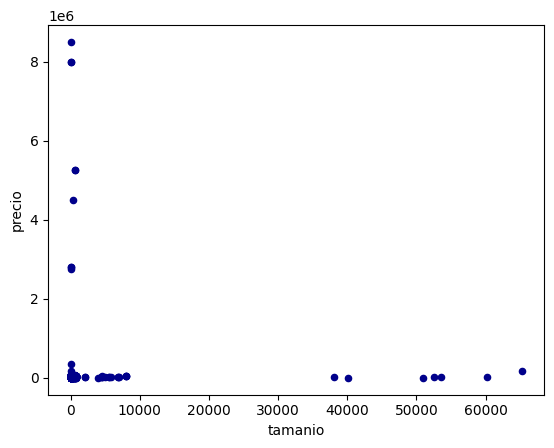

In [101]:
df.plot.scatter(x='tamanio', y='precio', c='DarkBlue')

Boxplots para observar los valores atipicos

<Axes: xlabel='precio'>

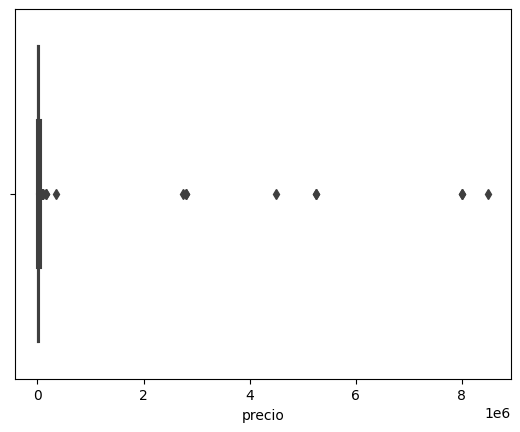

In [102]:
sns.boxplot(x=df['precio'])

<Axes: xlabel='tamanio'>

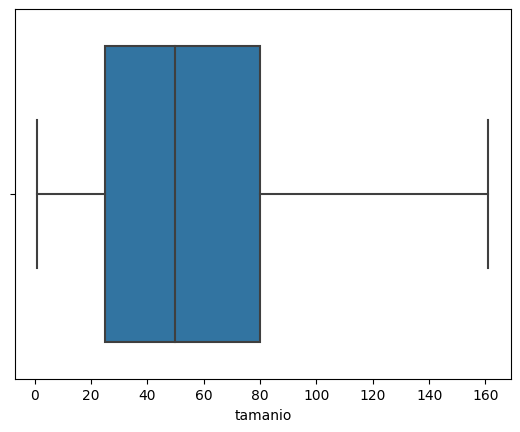

In [103]:
sns.boxplot(x=df['tamanio'], showfliers=False)

Observamos que el valor maximo de precio y tamanio esta muy por arriba del tercer percentil (75%) de los datos.

Al igual que en el precio minimo de las propiedades tambien existe un valor minimo muy por debajo del primer percentil (75%) por lo que concluimos que existen
outliers en los datos.

In [104]:
Q1 = df['precio'].quantile(0.25)
Q3 = df['precio'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5  # Puedes ajustar este valor según tu criterio

# Filtra los outliers y crea un nuevo DataFrame sin ellos
df_sin_outliers = df[(df['precio'] >= Q1 - outlier_threshold * IQR) & (df['precio'] <= Q3 + outlier_threshold * IQR)]

In [105]:
len(df_sin_outliers)

648

Unicamente eliminamos 33 datos. 

In [106]:
df_sin_outliers.head(3)

,precio,ubicacion,tamanio,direccion,mejor_coincidencia,MUNICIPIO,indice,indice_texto
0,29900,"Jose Maria Castorena 232, El Yaqui, Cuajimal...",802,Jose Maria Castorena 232,el yaqui,CUAJIMALPA DE MORELOS,0.944309,Muy Alto
1,18000,"Montecito 38, Nápoles, Benito Juárez",40,Montecito 38,napoles,BENITO JUAREZ,0.948575,Muy Alto
4,38000,"CTO. Interior Melchor Ocampo , Cuauhtémoc, C...",582,CTO. Interior Melchor Ocampo,cuauhtemoc,LA MAGDALENA CONTRERAS,0.851166,Medio


Revisamos ahora el grafico actualizado.

<Axes: xlabel='precio'>

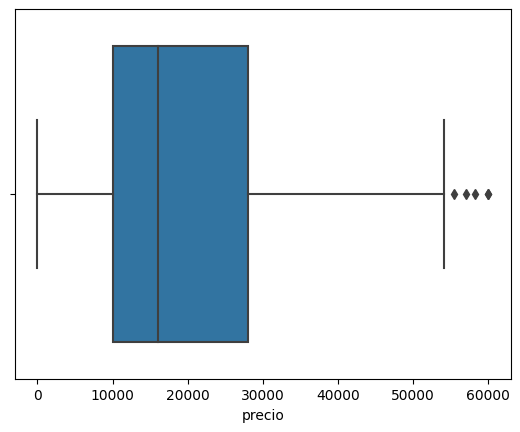

In [107]:
sns.boxplot(x=df_sin_outliers['precio'])

In [108]:
df = df_sin_outliers

Listo, tenemos completo nuestro dataset y ya podemos empezar a utilizarlo.

In [109]:
#cambiar el nombre de la columna mejor_coincidencia a colonia
df.rename(columns={'mejor_coincidencia': 'colonia'}, inplace=True)
df.rename(columns={'MUNICIPIO': 'municipio'}, inplace=True)

C:\Users\Adolfo\AppData\Local\Temp\ipykernel_8988\3295516885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'mejor_coincidencia': 'colonia'}, inplace=True)
C:\Users\Adolfo\AppData\Local\Temp\ipykernel_8988\3295516885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'MUNICIPIO': 'municipio'}, inplace=True)


In [110]:
#Crear una tabla nueva con las columnas colonia,precio,tamanio , indice llamada df_mapa_alcaldia


df_mapa_alcaldia = df[['colonia','precio','tamanio','indice','municipio']]
df_mapa_alcaldia.head(3)

,colonia,precio,tamanio,indice,municipio
0,el yaqui,29900,802,0.944309,CUAJIMALPA DE MORELOS
1,napoles,18000,40,0.948575,BENITO JUAREZ
4,cuauhtemoc,38000,582,0.851166,LA MAGDALENA CONTRERAS


In [111]:
#crear un hot encoding para la columna colonia y agregarlo a la tabla df_mapa
df_mapa_municipio = df_mapa_alcaldia[['municipio','precio','tamanio','indice']]

df_mapa_municipio = pd.concat([df_mapa_municipio,pd.get_dummies(df_mapa_municipio['municipio'], prefix='municipio')],axis=1)
df_mapa_municipio.head(3)

,municipio,precio,tamanio,indice,municipio_ALVARO OBREGON,municipio_AZCAPOTZALCO,municipio_BENITO JUAREZ,municipio_COYOACAN,municipio_CUAJIMALPA DE MORELOS,municipio_CUAUHTEMOC,municipio_GUSTAVO A. MADERO,municipio_IZTACALCO,municipio_IZTAPALAPA,municipio_LA MAGDALENA CONTRERAS,municipio_MIGUEL HIDALGO,municipio_TLAHUAC,municipio_TLALPAN,municipio_VENUSTIANO CARRANZA,municipio_XOCHIMILCO
0,CUAJIMALPA DE MORELOS,29900,802,0.944309,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,BENITO JUAREZ,18000,40,0.948575,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,LA MAGDALENA CONTRERAS,38000,582,0.851166,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [112]:
df_mapa_municipio = df_mapa_municipio.drop(['municipio'], axis=1)

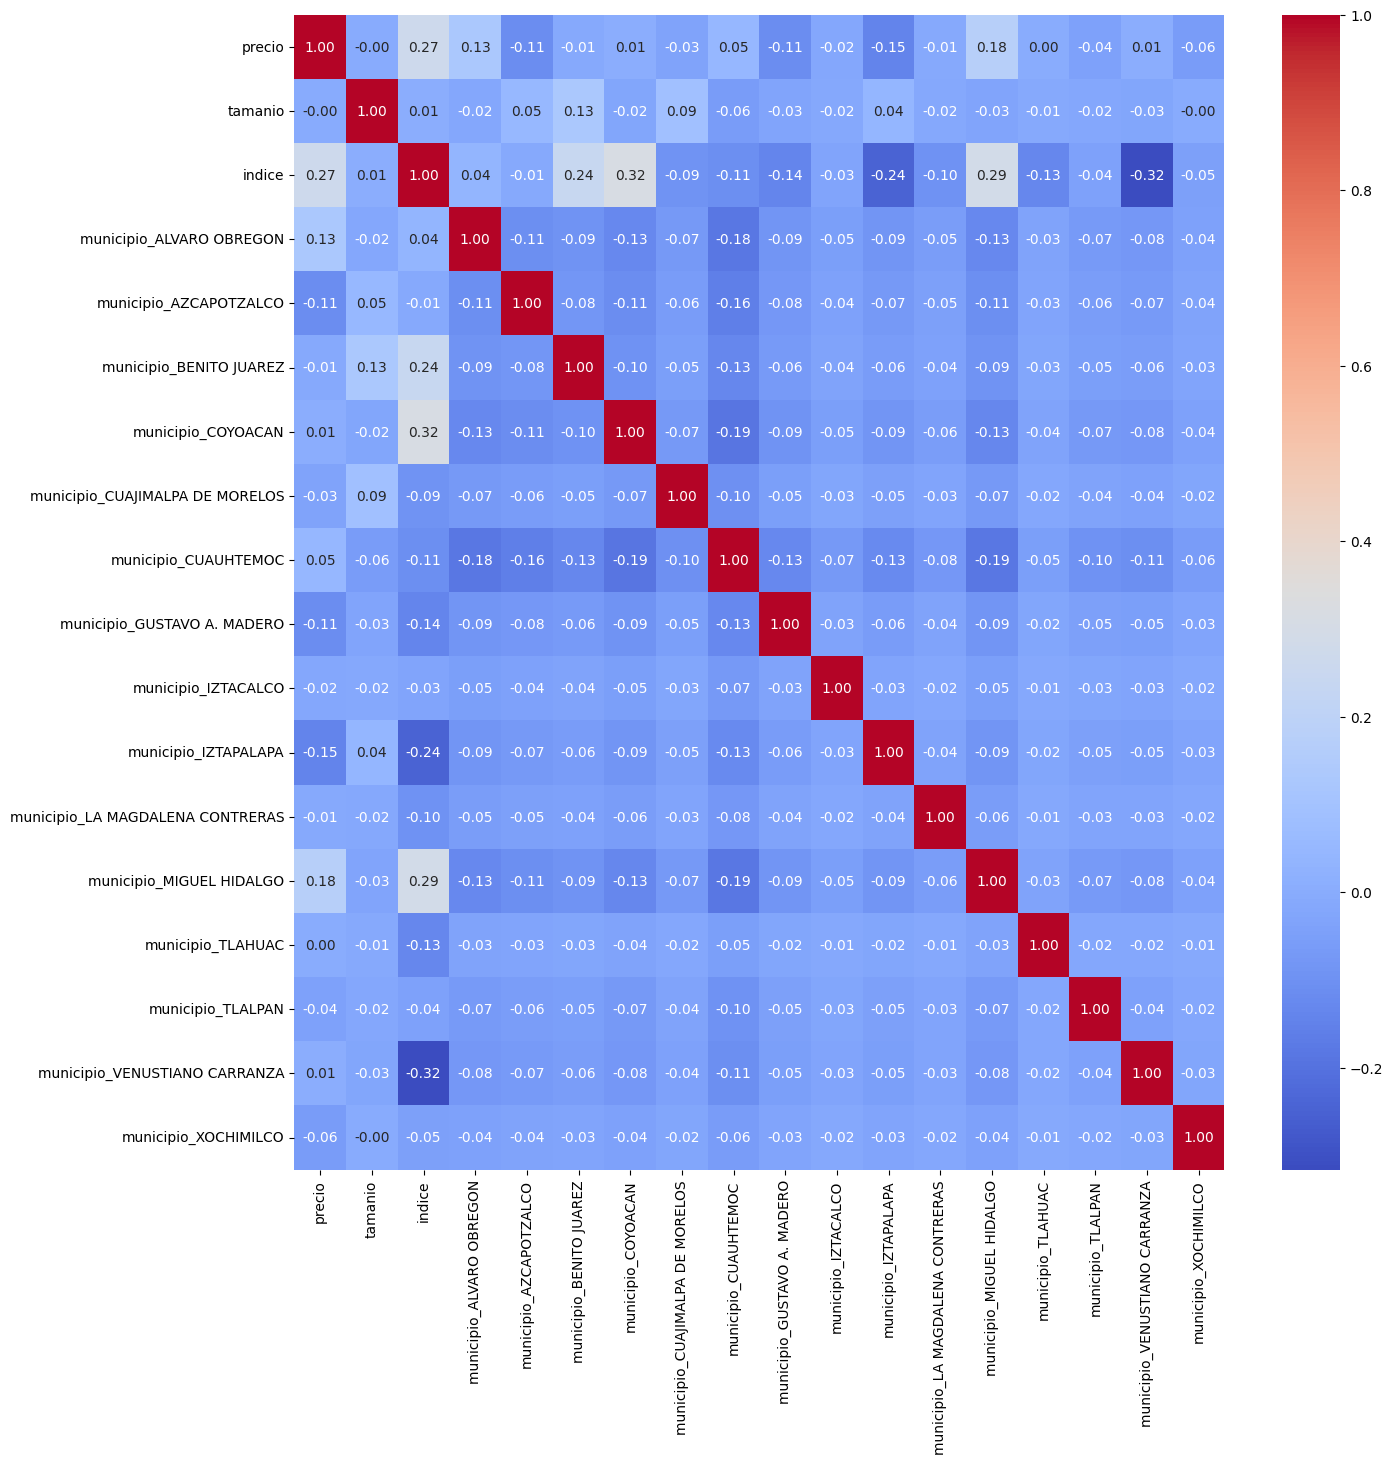

In [113]:
#crear un heatmap para ver la correlacion entre las variables
corr = df_mapa_municipio.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

¿Cuales son las variables que tienen mayor correlacion con el precio?

In [114]:
corr['precio'].sort_values(ascending=False)


precio                              1.000000
indice                              0.266440
municipio_MIGUEL HIDALGO            0.176607
municipio_ALVARO OBREGON            0.127127
municipio_CUAUHTEMOC                0.047801
municipio_COYOACAN                  0.007099
municipio_VENUSTIANO CARRANZA       0.006561
municipio_TLAHUAC                   0.001987
tamanio                            -0.003862
municipio_LA MAGDALENA CONTRERAS   -0.008441
municipio_BENITO JUAREZ            -0.008800
municipio_IZTACALCO                -0.021775
municipio_CUAJIMALPA DE MORELOS    -0.034385
municipio_TLALPAN                  -0.039978
municipio_XOCHIMILCO               -0.063422
municipio_AZCAPOTZALCO             -0.112601
municipio_GUSTAVO A. MADERO        -0.114060
municipio_IZTAPALAPA               -0.146479
Name: precio, dtype: float64

Tras analizar el correlograma  llegamos a la conclucion:

-  Existe una correlacion baja-media entre el indice de desarrollo social alto con las alcaldias Benito Juares y Coyoacan.
-  Existe una correlacion baja-media entre el indice de desarrollo social bajo con las alcaldias Venustiana Carranza e Iztapalapa.
-  Existe una correlacion baja-media entre el precio de los locales y el indice de desarrollo social.
-  Existe una correlacion baja entre el tamaño de los locales con la alcaldia iztapalapa (Quizá sea por el número de bodegas que hay en la zona).
-  Existe una correlacion baja con el precio de los locales y la alcaldía Miguel Hidalgo.

¿Cual es el local más caro y más barato?

In [115]:
# Supongamos que df_sin_outliers es tu DataFrame después de eliminar los outliers
fila_max_precio = df_sin_outliers.loc[df_sin_outliers['precio'].idxmax()]
fila_min_precio = df_sin_outliers.loc[df_sin_outliers['precio'].idxmin()]

print(f'El local con el precio máximo son:\n{fila_max_precio.values}')
print(f'El local con el precio mínimo son:\n{fila_min_precio.values}')


El local con el precio máximo son:
[60000 ' Masaryk ,  Polanco, Miguel Hidalgo' 8021 ' Masaryk '
 'bosques de chapultepec (polanco)' 'MIGUEL HIDALGO' 0.96290083929
 ' Muy Alto']
El local con el precio mínimo son:
[1 ' Av. Rio Churubusco 1072,  Nueva Rosita, Iztapalapa' 50960
 ' Av. Rio Churubusco 1072' 'la nueva rosita' 'IZTAPALAPA' 0.83250375769
 'Medio']


Agregaremos a el dataframe una nueva columna llamada precio por metro cuadrado.

In [117]:
#Agregaremos a el dataframe una nueva columna llamada precio por metro cuadrado. 
df_sin_outliers['precio_m2'] = df_sin_outliers['precio'] / df_sin_outliers['tamanio']

C:\Users\Adolfo\AppData\Local\Temp\ipykernel_8988\1760662670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_outliers['precio_m2'] = df_sin_outliers['precio'] / df_sin_outliers['tamanio']


¿Sera que el precio por metro cuadrado arroje nuevas conclusiones?

In [121]:
#crear un hot encoding para la columna colonia y agregarlo a la tabla df_mapa
df_mapa_municipio_2 = df_sin_outliers[['municipio','precio','tamanio','indice', 'precio_m2']]

df_mapa_municipio_2 = pd.concat([df_sin_outliers,pd.get_dummies(df_sin_outliers['municipio'], prefix='municipio')],axis=1)
df_mapa_municipio_2.head(3)

,precio,ubicacion,tamanio,direccion,colonia,municipio,indice,indice_texto,precio_m2,municipio_ALVARO OBREGON,...,municipio_CUAUHTEMOC,municipio_GUSTAVO A. MADERO,municipio_IZTACALCO,municipio_IZTAPALAPA,municipio_LA MAGDALENA CONTRERAS,municipio_MIGUEL HIDALGO,municipio_TLAHUAC,municipio_TLALPAN,municipio_VENUSTIANO CARRANZA,municipio_XOCHIMILCO
0,29900,"Jose Maria Castorena 232, El Yaqui, Cuajimal...",802,Jose Maria Castorena 232,el yaqui,CUAJIMALPA DE MORELOS,0.944309,Muy Alto,37.281796,False,...,False,False,False,False,False,False,False,False,False,False
1,18000,"Montecito 38, Nápoles, Benito Juárez",40,Montecito 38,napoles,BENITO JUAREZ,0.948575,Muy Alto,450.000000,False,...,False,False,False,False,False,False,False,False,False,False
4,38000,"CTO. Interior Melchor Ocampo , Cuauhtémoc, C...",582,CTO. Interior Melchor Ocampo,cuauhtemoc,LA MAGDALENA CONTRERAS,0.851166,Medio,65.292096,False,...,False,False,False,False,True,False,False,False,False,False


In [129]:
df_mapa_municipio_2 = df_mapa_municipio_2.drop(['ubicacion'], axis=1)
df_mapa_municipio_2 = df_mapa_municipio_2.drop(['direccion'], axis=1)
df_mapa_municipio_2 = df_mapa_municipio_2.drop(['municipio'], axis=1)
df_mapa_municipio_2 = df_mapa_municipio_2.drop(['colonia'], axis=1)
df_mapa_municipio_2 = df_mapa_municipio_2.drop(['indice_texto'], axis=1)

KeyError: "['ubicacion'] not found in axis"

In [130]:
df_mapa_municipio_2 = df_mapa_municipio_2.drop(['indice_texto'], axis=1)

In [131]:
df_mapa_municipio_2

,precio,tamanio,indice,precio_m2,municipio_ALVARO OBREGON,municipio_AZCAPOTZALCO,municipio_BENITO JUAREZ,municipio_COYOACAN,municipio_CUAJIMALPA DE MORELOS,municipio_CUAUHTEMOC,municipio_GUSTAVO A. MADERO,municipio_IZTACALCO,municipio_IZTAPALAPA,municipio_LA MAGDALENA CONTRERAS,municipio_MIGUEL HIDALGO,municipio_TLAHUAC,municipio_TLALPAN,municipio_VENUSTIANO CARRANZA,municipio_XOCHIMILCO
0,29900,802,0.944309,37.281796,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,18000,40,0.948575,450.000000,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,38000,582,0.851166,65.292096,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
5,38000,582,0.936285,65.292096,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
6,16000,181,0.877190,88.397790,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,7000,16,0.841355,437.500000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
676,11000,20,0.820551,550.000000,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
677,32000,55,0.906251,581.818182,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
678,32000,55,0.805854,581.818182,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


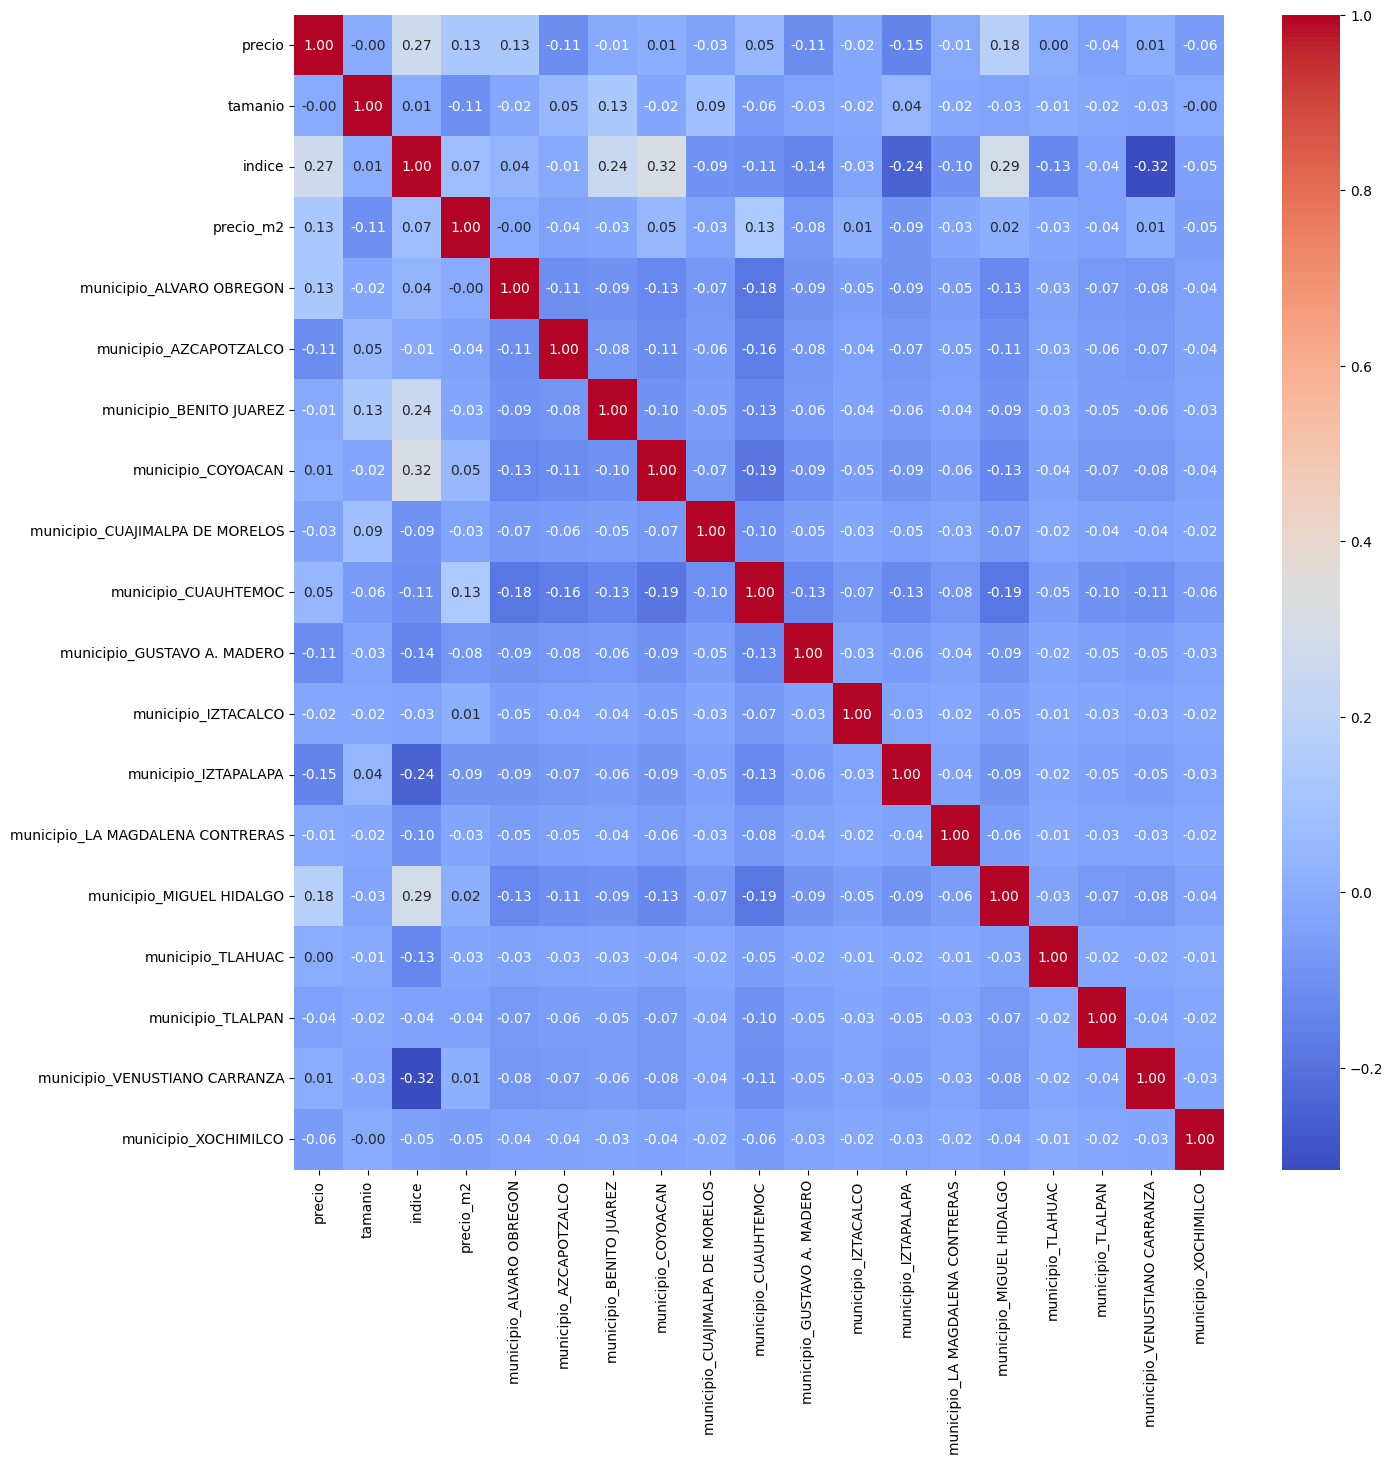

In [132]:
#crear un heatmap para ver la correlacion entre las variables
corr = df_mapa_municipio_2.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [133]:
corr['precio_m2'].sort_values(ascending=False)


precio_m2                           1.000000
municipio_CUAUHTEMOC                0.134857
precio                              0.130922
indice                              0.074310
municipio_COYOACAN                  0.052236
municipio_MIGUEL HIDALGO            0.017571
municipio_VENUSTIANO CARRANZA       0.011916
municipio_IZTACALCO                 0.009994
municipio_ALVARO OBREGON           -0.004710
municipio_BENITO JUAREZ            -0.025340
municipio_LA MAGDALENA CONTRERAS   -0.025842
municipio_TLAHUAC                  -0.026145
municipio_CUAJIMALPA DE MORELOS    -0.029737
municipio_AZCAPOTZALCO             -0.035433
municipio_TLALPAN                  -0.042081
municipio_XOCHIMILCO               -0.049417
municipio_GUSTAVO A. MADERO        -0.078049
municipio_IZTAPALAPA               -0.085789
tamanio                            -0.109177
Name: precio_m2, dtype: float64

- Bueno, podemos observar que tiene correlacion con el municipio_CUAHTEMOC ¿Será que es el precio más alto por metro cuadrado?

- Evidentemente tiene relacion con el precio del local.

In [134]:
df_sin_outliers.head(3)

,precio,ubicacion,tamanio,direccion,colonia,municipio,indice,indice_texto,precio_m2
0,29900,"Jose Maria Castorena 232, El Yaqui, Cuajimal...",802,Jose Maria Castorena 232,el yaqui,CUAJIMALPA DE MORELOS,0.944309,Muy Alto,37.281796
1,18000,"Montecito 38, Nápoles, Benito Juárez",40,Montecito 38,napoles,BENITO JUAREZ,0.948575,Muy Alto,450.000000
4,38000,"CTO. Interior Melchor Ocampo , Cuauhtémoc, C...",582,CTO. Interior Melchor Ocampo,cuauhtemoc,LA MAGDALENA CONTRERAS,0.851166,Medio,65.292096


In [135]:
#cambiar nombre de municipio a alcaldia
df_sin_outliers.rename(columns={'municipio': 'alcaldia'}, inplace=True)

Precios de renta por metro cuadrado en la CDMX por alcaldia 

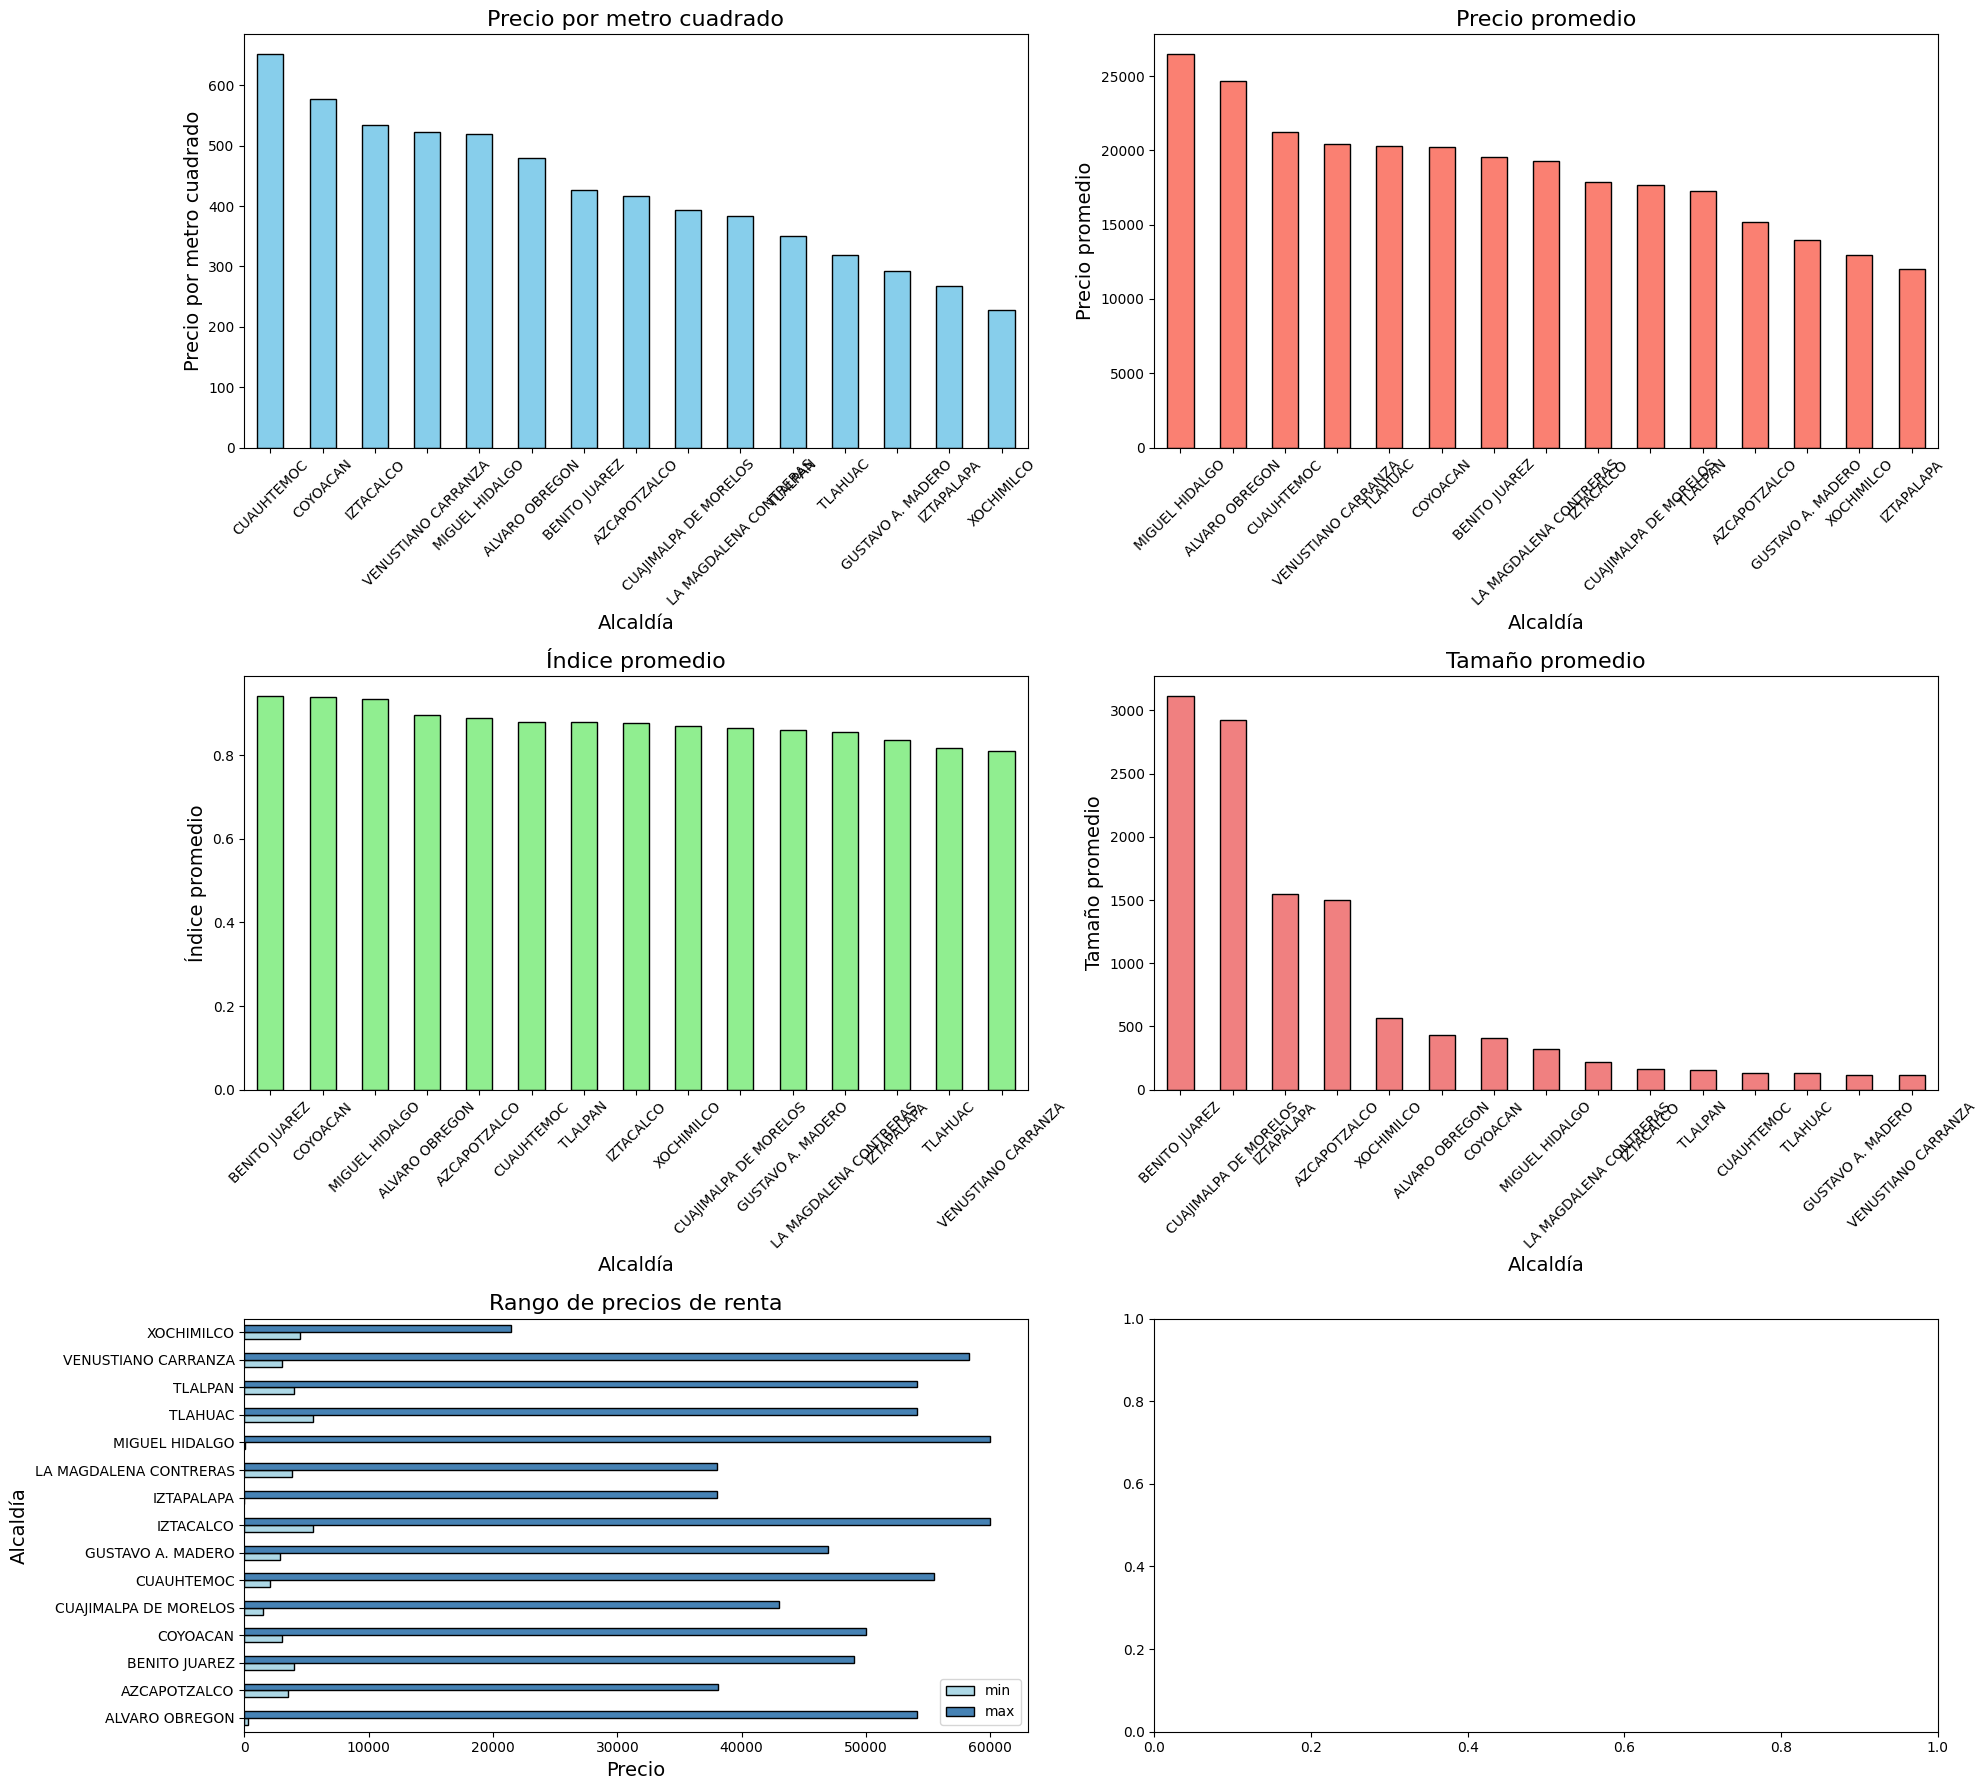

In [144]:

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))

df_sin_outliers.groupby('alcaldia')['precio_m2'].mean().sort_values(ascending=False).plot(kind='bar', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Precio por metro cuadrado', fontsize=16)
axes[0, 0].set_xlabel('Alcaldía', fontsize=14)
axes[0, 0].set_ylabel('Precio por metro cuadrado', fontsize=14)
axes[0, 0].tick_params(axis='x', labelrotation=45)

df_sin_outliers.groupby('alcaldia')['precio'].mean().sort_values(ascending=False).plot(kind='bar', ax=axes[0, 1], color='salmon', edgecolor='black')
axes[0, 1].set_title('Precio promedio', fontsize=16)
axes[0, 1].set_xlabel('Alcaldía', fontsize=14)
axes[0, 1].set_ylabel('Precio promedio', fontsize=14)
axes[0, 1].tick_params(axis='x', labelrotation=45)

df_sin_outliers.groupby('alcaldia')['indice'].mean().sort_values(ascending=False).plot(kind='bar', ax=axes[1, 0], color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Índice promedio', fontsize=16)
axes[1, 0].set_xlabel('Alcaldía', fontsize=14)
axes[1, 0].set_ylabel('Índice promedio', fontsize=14)
axes[1, 0].tick_params(axis='x', labelrotation=45)

df_sin_outliers.groupby('alcaldia')['tamanio'].mean().sort_values(ascending=False).plot(kind='bar', ax=axes[1, 1], color='lightcoral', edgecolor='black')
axes[1, 1].set_title('Tamaño promedio', fontsize=16)
axes[1, 1].set_xlabel('Alcaldía', fontsize=14)
axes[1, 1].set_ylabel('Tamaño promedio', fontsize=14)
axes[1, 1].tick_params(axis='x', labelrotation=45)

df_sin_outliers.groupby('alcaldia')['precio'].agg(['min', 'max']).plot(kind='barh', ax=axes[2, 0], color=['lightblue', 'steelblue'], edgecolor='black')
axes[2, 0].set_title('Rango de precios de renta', fontsize=16)
axes[2, 0].set_xlabel('Precio', fontsize=14)
axes[2, 0].set_ylabel('Alcaldía', fontsize=14)

plt.tight_layout()

plt.show()


---------------------------------

In [145]:
df_sin_outliers

,precio,ubicacion,tamanio,direccion,colonia,alcaldia,indice,indice_texto,precio_m2
0,29900,"Jose Maria Castorena 232, El Yaqui, Cuajimal...",802,Jose Maria Castorena 232,el yaqui,CUAJIMALPA DE MORELOS,0.944309,Muy Alto,37.281796
1,18000,"Montecito 38, Nápoles, Benito Juárez",40,Montecito 38,napoles,BENITO JUAREZ,0.948575,Muy Alto,450.000000
4,38000,"CTO. Interior Melchor Ocampo , Cuauhtémoc, C...",582,CTO. Interior Melchor Ocampo,cuauhtemoc,LA MAGDALENA CONTRERAS,0.851166,Medio,65.292096
5,38000,"CTO. Interior Melchor Ocampo , Cuauhtémoc, C...",582,CTO. Interior Melchor Ocampo,cuauhtemoc,CUAUHTEMOC,0.936285,Muy Alto,65.292096
6,16000,"division del norte 515, Del Valle Norte, Ben...",181,division del norte 515,del gas,AZCAPOTZALCO,0.877190,Medio,88.397790
...,...,...,...,...,...,...,...,...,...
675,7000,"Av. Constituyentes 757, Belém de las Flores,...",16,Av. Constituyentes 757,belen de las flores,ALVARO OBREGON,0.841355,Medio,437.500000
676,11000,"Unidad 8 de agosto, 8 de Agosto, Benito Juárez",20,Unidad 8 de agosto,15 de agosto,GUSTAVO A. MADERO,0.820551,Bajo,550.000000
677,32000,Ermita Iztapalapa & Prolongación Javier Rojo ...,55,Ermita Iztapalapa & Prolongación Javier Rojo ...,el molino,CUAJIMALPA DE MORELOS,0.906251,Alto,581.818182
678,32000,Ermita Iztapalapa & Prolongación Javier Rojo ...,55,Ermita Iztapalapa & Prolongación Javier Rojo ...,el molino,IZTAPALAPA,0.805854,Bajo,581.818182


In [155]:
#Crear una tabla solo con las columnas que se usaran para el modelo de prediccion
df_modelo = df_sin_outliers[['tamanio', 'indice', 'precio','alcaldia']] 

#crear un hot encoding para la columna colonia y agregarlo a la tabla df_mapa
df_modelo = pd.concat([df_modelo,pd.get_dummies(df_modelo['alcaldia'], prefix='alcaldia')],axis=1)
df_modelo.head(3)

,tamanio,indice,precio,alcaldia,alcaldia_ALVARO OBREGON,alcaldia_AZCAPOTZALCO,alcaldia_BENITO JUAREZ,alcaldia_COYOACAN,alcaldia_CUAJIMALPA DE MORELOS,alcaldia_CUAUHTEMOC,alcaldia_GUSTAVO A. MADERO,alcaldia_IZTACALCO,alcaldia_IZTAPALAPA,alcaldia_LA MAGDALENA CONTRERAS,alcaldia_MIGUEL HIDALGO,alcaldia_TLAHUAC,alcaldia_TLALPAN,alcaldia_VENUSTIANO CARRANZA,alcaldia_XOCHIMILCO
0,802,0.944309,29900,CUAJIMALPA DE MORELOS,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,40,0.948575,18000,BENITO JUAREZ,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,582,0.851166,38000,LA MAGDALENA CONTRERAS,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [158]:
#eliminar la columna alcaldia
df_modelo = df_modelo.drop(['alcaldia'], axis=1)

In [188]:
# eliminar los precios inferiores a 3000 pesos
df_modelo = df_modelo[df_modelo['precio'] > 3000]


In [202]:
#seleccionar solo la alcaldia Benito Juarez
df_modelo = df_modelo[df_modelo['alcaldia_BENITO JUAREZ'] == 1]

In [205]:
#exportar a un csv el dataframe df_modelo
df_modelo.to_csv('df_modelo.csv', index=False)

In [204]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

 
X_encoded = df_modelo.drop(['precio'], axis=1)   
y_encoded = df_modelo['precio']

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Modelos disponibles
models = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión LASSO': Lasso(),
    'Bosques Aleatorios': RandomForestRegressor()
}

# Entrenar y evaluar cada modelo con las nuevas columnas codificadas
results_encoded = {}
for model_name, model in models.items():
    model.fit(X_train_encoded, y_train_encoded)
    predictions_encoded = model.predict(X_test_encoded)
    mse_encoded = mean_squared_error(y_test_encoded, predictions_encoded)
    results_encoded[model_name] = mse_encoded

# Mostrar resultados con las columnas codificadas
for model_name, mse_encoded in results_encoded.items():
    print(f'MSE del {model_name} con columnas codificadas: {mse_encoded:.2f}')


MSE del Regresión Lineal con columnas codificadas: 41228867.29
MSE del Regresión Ridge con columnas codificadas: 53297405.77
MSE del Regresión LASSO con columnas codificadas: 41398060.49
MSE del Bosques Aleatorios con columnas codificadas: 119246823.50
